In [1]:
import tensorflow as tf
print (tf.__version__)

2.11.0


In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [6]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) 

In [8]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8718.9697 - mae: 8718.9697
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7872.0596 - mae: 7872.0596
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7584.5610 - mae: 7584.5610
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7568.5693 - mae: 7568.5693
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7668.0962 - mae: 7668.0962
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7643.4438 - mae: 7643.4438
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7571.9453 - mae: 7571.9453
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7757.9609 - mae: 7757.9609
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7604.2661 - mae: 7604.2661
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7699.2896 - mae: 7699.2896

34/34 [==============================] - 0s 1ms/step - loss: 7162.1509 - mae: 7162.1509
Epoch 83/100
34/34 [==============================] - 0s 1ms/step - loss: 7478.5474 - mae: 7478.5474
Epoch 84/100
34/34 [==============================] - 0s 1ms/step - loss: 7404.6338 - mae: 7404.6338
Epoch 85/100
34/34 [==============================] - 0s 1ms/step - loss: 7557.0127 - mae: 7557.0127
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 7497.9688 - mae: 7497.9688
Epoch 87/100
34/34 [==============================] - 0s 1ms/step - loss: 7197.6357 - mae: 7197.6357
Epoch 88/100
34/34 [==============================] - 0s 1ms/step - loss: 7112.9048 - mae: 7112.9048
Epoch 89/100
34/34 [==============================] - 0s 1ms/step - loss: 7540.6572 - mae: 7540.6572
Epoch 90/100
34/34 [==============================] - 0s 1ms/step - loss: 6968.7876 - mae: 6968.7876
Epoch 91/100
34/34 [==============================] - 0s 1ms/step - loss: 7203.7407 - mae: 7203.7407
Epo

In [9]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8536.4570 - mae: 8536.4570


[8536.45703125, 8536.45703125]

In [10]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [11]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4860.3794 - mae: 4860.3794


[4860.37939453125, 4860.37939453125]

Text(0.5, 0, 'Epochs')

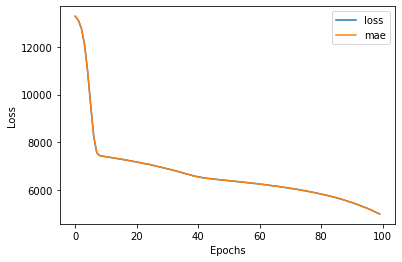

In [12]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [13]:
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

Text(0.5, 0, 'Epochs')

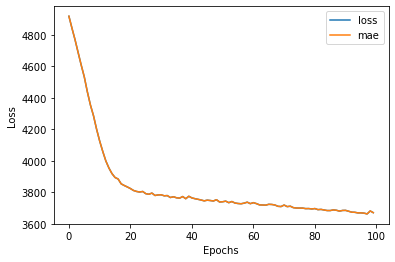

In [14]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [16]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

X = insurance.drop("charges",axis=1)
y = insurance["charges"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [18]:
X_train, X_train_normal

(      age     sex     bmi  children smoker     region
 560    46  female  19.950         2     no  northwest
 1285   47  female  24.320         0     no  northeast
 1142   52  female  24.860         0     no  southeast
 969    39  female  34.320         5     no  southeast
 486    54  female  21.470         3     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1095   18  female  31.350         4     no  northeast
 1130   39  female  23.870         5     no  southeast
 1294   58    male  25.175         0     no  northeast
 860    37  female  47.600         2    yes  southwest
 1126   55    male  29.900         0     no  southwest
 
 [1070 rows x 6 columns],
 array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.

In [19]:
insurance_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               1200      
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [20]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss= tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.SGD(),
                          metrics=["mae"])

history3=insurance_model_3.fit(X_train_normal, y_train, epochs = 200, verbose=0)

In [21]:
insurance_model_3.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3503.2180 - mae: 3503.2180


[3503.218017578125, 3503.218017578125]

Text(0.5, 0, 'Epochs')

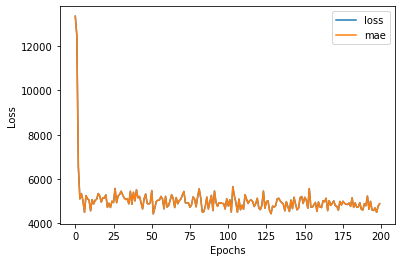

In [22]:
pd.DataFrame(history3.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [23]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss= tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=['mae'])
                 
history4 = insurance_model_4.fit(X_train_normal, y_train, epochs=300, verbose=0)

In [24]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3168.0264 - mae: 3168.0264


[3168.0263671875, 3168.0263671875]

Text(0.5, 0, 'Epochs')

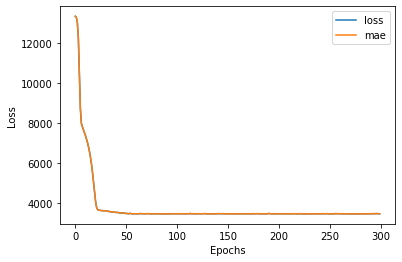

In [25]:
pd.DataFrame(history4.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [26]:
tf.random.set_seed(42)

insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])

insurance_model_5.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
                          metrics=['mae'])

history5=insurance_model_5.fit(X_train_normal, y_train, epochs = 200, verbose=0)

In [27]:
insurance_model_5.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1346.5050 - mae: 1346.5050


[1346.5050048828125, 1346.5050048828125]

Text(0.5, 0, 'Epochs')

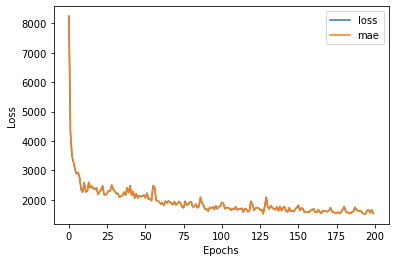

In [28]:
pd.DataFrame(history5.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")